# Lab 3: Policy Search

## Task

Write agents able to play [*Nim*](https://en.wikipedia.org/wiki/Nim), with an arbitrary number of rows and an upper bound $k$ on the number of objects that can be removed in a turn (a.k.a., *subtraction game*).

The player taking the last object wins.

* Task3.4: An agent using reinforcement learning

In [1]:
# Copied and adapted from
# https://towardsdatascience.com/hands-on-introduction-to-reinforcement-learning-in-python-da07f7aaca88


from nim_environment import NimBoard
from rl_agent import Agent
import matplotlib.pyplot as plt
from nim_utils import game_over, level_zero, pure_random, level_two, level_three, expert_strategy, Nimply

## **Reinforcement Learning**

In [2]:
def reinforcement_learning_nim(nim_size, strategy, robot=None):
    nim = NimBoard(nim_size)
    if robot is None:
        robot = Agent(nim, alpha=0.1, random_factor=0.4)
    moveHistory = []
    indices = []

    nim.display_board()
    print()
    
    players = ['agent', 'b']
    turn = 0

    final_state = tuple([0 for _ in range(nim_size)])

    for i in range(10_000):

        while not game_over(nim, players, turn):
            
            if players[turn] == "b":
                 ply = strategy(nim)
                 nim.nimming(ply)

            if players[turn] == "agent":
                state, _ = nim.get_state_and_reward()  # get the current state
                # choose an action (explore or exploit)
                action = robot.choose_action(state)
                nim.update_board(action)  # update the nim according to the action
                state, reward = nim.get_state_and_reward()  # get the new state and reward
                # update the robot memory with state and reward
                if state != final_state:
                    robot.update_state_history(state, reward)
                if nim.steps > 1000:
                    # end the robot if it takes too long to find the goal
                    for idx in range(len(nim.rows)):
                        nim.rows[idx] = 0
            
            turn = (turn + 1) % 2
        state, reward = nim.get_state_and_reward(nim.winner == 0)
        robot.update_state_history(state, reward)

        robot.update_results(nim.winner == 0)
        robot.learn()  # robot should learn after every episode
        # get a history of number of steps taken to plot later
        if i % 50 == 0:
            print(f"{i}: {robot.get_avg_wins()}")
            moveHistory.append(robot.get_avg_wins())
            indices.append(i)
        nim = NimBoard(nim_size)  # reinitialize the nim

    plt.semilogy(indices, moveHistory, "b")
    plt.show()

    return robot


#### **Reinforce Agent with Nim(3)**

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 1.0
50: 0.8431372549019608
100: 0.8613861386138614
150: 0.8543046357615894
200: 0.8507462686567164
250: 0.8605577689243028
300: 0.8604651162790697
350: 0.8660968660968661
400: 0.8678304239401496
450: 0.8713968957871396
500: 0.8642714570858283
550: 0.8711433756805808
600: 0.8785357737104825
650: 0.8863287250384024
700: 0.891583452211127
750: 0.8934753661784287
800: 0.9001248439450686
850: 0.9012925969447708
900: 0.9001109877913429
950: 0.9043112513144059
1000: 0.906093906093906
1050: 0.9096098953377736
1100: 0.9100817438692098
1150: 0.9070373588184187
1200: 0.906744379683597
1250: 0.9104716227018386
1300: 0.9100691775557264
1350: 0.9111769059955589
1400: 0.9114917915774446
1450: 0.9117849758787043
1500: 0.9127248500999334
1550: 0.9142488716956803
1600: 0.9156777014366021
1650: 0.9158086008479709
1700: 0.9176954732510288
1750: 0.9177612792689891
1800: 0.9189339255968906
1850: 0.9200432198811453
1900: 0.9221462388216728
1950: 0.924141

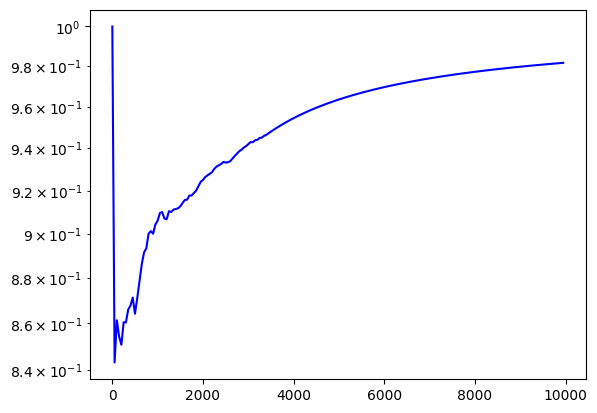

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 1.0
50: 0.7843137254901961
100: 0.7425742574257426
150: 0.7615894039735099
200: 0.7412935323383084
250: 0.7609561752988048
300: 0.760797342192691
350: 0.7492877492877493
400: 0.743142144638404
450: 0.7516629711751663
500: 0.7544910179640718
550: 0.7477313974591652
600: 0.7371048252911814
650: 0.7419354838709677
700: 0.7489300998573466
750: 0.7430093209054593
800: 0.7428214731585518
850: 0.7414806110458284
900: 0.7425083240843507
950: 0.7476340694006309
1000: 0.7452547452547452
1050: 0.7497621313035204
1100: 0.7511353315168029
1150: 0.7541268462206777
1200: 0.7568692756036636
1250: 0.7521982414068745
1300: 0.754803996925442
1350: 0.7572168763878608
1400: 0.7587437544610992
1450: 0.7622329427980703
1500: 0.7634910059960026
1550: 0.7627337201805287
1600: 0.763897564022486
1650: 0.7655966081162932
1700: 0.7660199882422105
1750: 0.7709880068532268
1800: 0.7712382009994447
1850: 0.7703943814154511
1900: 0.7716991057338243
1950: 0.7719118

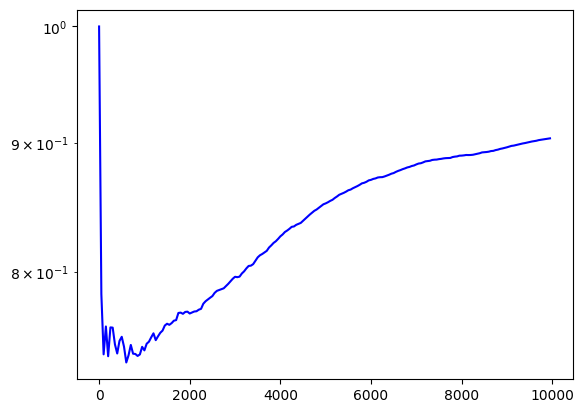

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.27450980392156865
100: 0.22772277227722773
150: 0.304635761589404
200: 0.3333333333333333
250: 0.30677290836653387
300: 0.2857142857142857
350: 0.3076923076923077
400: 0.32917705735660846
450: 0.34811529933481156
500: 0.34930139720558884
550: 0.35753176043557167
600: 0.3610648918469218
650: 0.37327188940092165
700: 0.3908701854493581
750: 0.3968042609853529
800: 0.40324594257178525
850: 0.40775558166862513
900: 0.41509433962264153
950: 0.4195583596214511
1000: 0.4165834165834166
1050: 0.42150333016175073
1100: 0.4268846503178928
1150: 0.4370112945264987
1200: 0.4479600333055787
1250: 0.4524380495603517
1300: 0.4558032282859339
1350: 0.461880088823094
1400: 0.46466809421841543
1450: 0.47346657477601656
1500: 0.4770153231179214
1550: 0.4816247582205029
1600: 0.48782011242973145
1650: 0.4912174439733495
1700: 0.49794238683127573
1750: 0.5014277555682467
1800: 0.5036091060521932
1850: 0.5072933549432739
1900: 0.51183587585481

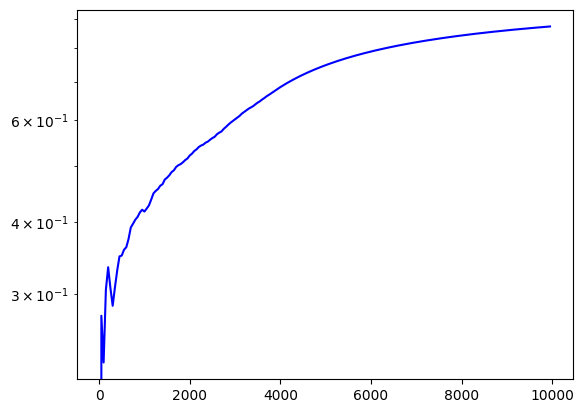

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.0196078431372549
100: 0.1485148514851485
150: 0.1986754966887417
200: 0.2537313432835821
250: 0.2868525896414343
300: 0.3089700996677741
350: 0.3247863247863248
400: 0.33915211970074816
450: 0.3370288248337029
500: 0.34331337325349304
550: 0.3502722323049002
600: 0.33943427620632277
650: 0.3425499231950845
700: 0.3466476462196862
750: 0.3488681757656458
800: 0.35081148564294634
850: 0.3584018801410106
900: 0.36736958934517205
950: 0.37013669821240797
1000: 0.38161838161838163
1050: 0.3910561370123692
1100: 0.3996366939146231
1150: 0.4100781928757602
1200: 0.4163197335553705
1250: 0.41886490807354115
1300: 0.4242890084550346
1350: 0.43153219837157664
1400: 0.43611705924339755
1450: 0.4383184011026878
1500: 0.4430379746835443
1550: 0.44745325596389424
1600: 0.45346658338538415
1650: 0.45790430042398544
1700: 0.4638447971781305
1750: 0.47001713306681897
1800: 0.4714047751249306
1850: 0.47541869259859537
1900: 0.4776433456075

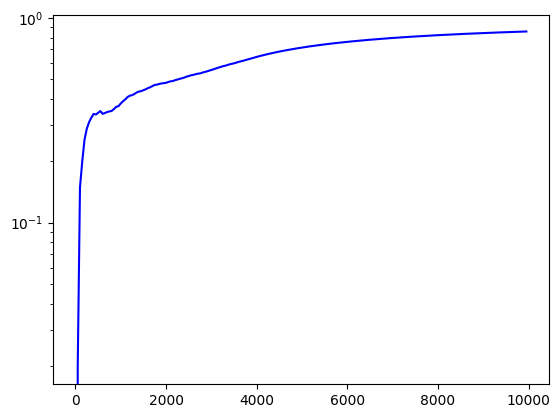

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.0784313725490196
100: 0.12871287128712872
150: 0.1390728476821192
200: 0.15920398009950248
250: 0.15139442231075698
300: 0.17940199335548174
350: 0.1908831908831909
400: 0.19451371571072318
450: 0.2017738359201774
500: 0.20758483033932135
550: 0.21052631578947367
600: 0.2146422628951747
650: 0.2227342549923195
700: 0.2296718972895863
750: 0.23435419440745672
800: 0.24094881398252185
850: 0.24676850763807284
900: 0.25305216426193117
950: 0.2565720294426919
1000: 0.26073926073926074
1050: 0.2626070409134158
1100: 0.2633969118982743
1150: 0.26585577758470896
1200: 0.2681099084096586
1250: 0.26778577138289367
1300: 0.2697924673328209
1350: 0.27313101406365653
1400: 0.2755174875089222
1450: 0.2777394900068918
1500: 0.2804796802131912
1550: 0.28368794326241137
1600: 0.28544659587757654
1650: 0.28588734100545127
1700: 0.2874779541446208
1750: 0.2884066247858367
1800: 0.2915047196002221
1850: 0.2955159373311723
1900: 0.2987901104

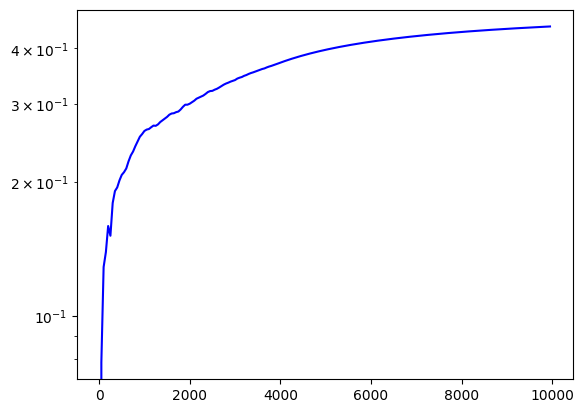

In [10]:
NIM_SIZE = 3
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy)

#### **Reinforce Agent with Nim(5)**

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.8627450980392157
100: 0.8712871287128713
150: 0.8874172185430463
200: 0.8706467661691543
250: 0.8764940239043825
300: 0.8704318936877077
350: 0.8803418803418803
400: 0.8827930174563591
450: 0.8780487804878049
500: 0.8862275449101796
550: 0.8856624319419237
600: 0.8885191347753744
650: 0.8894009216589862
700: 0.8901569186875892
750: 0.8934753661784287
800: 0.8901373283395755
850: 0.8895417156286721
900: 0.8934517203107658
950: 0.8969505783385909
1000: 0.9020979020979021
1050: 0.9048525214081827
1100: 0.9055404178019982
1150: 0.9079061685490878
1200: 0.9084096586178185
1250: 0.9104716227018386
1300: 0.9116064565718678
1350: 0.9111769059955589
1400: 0.9143468950749465
1450: 0.9145416953824949
1500: 0.9153897401732178
1550: 0.9161831076724694
1600: 0.9169269206745784
1650: 0.919442761962447
1700: 0.921222810111699
1750: 0.9229011993146773
1800: 0.9239311493614658
1850: 0.9

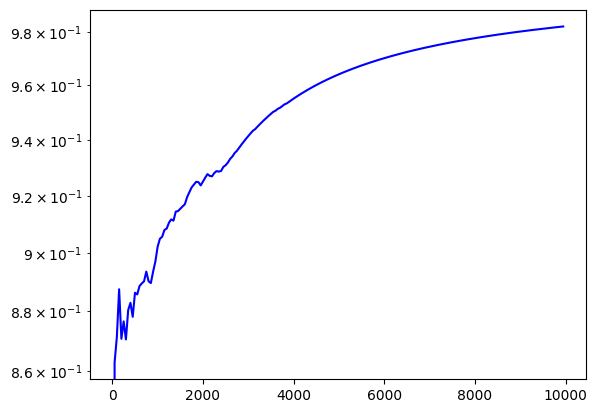

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 1.0
50: 0.6666666666666666
100: 0.7821782178217822
150: 0.7615894039735099
200: 0.746268656716418
250: 0.749003984063745
300: 0.7475083056478405
350: 0.7492877492877493
400: 0.7481296758104738
450: 0.7583148558758315
500: 0.7704590818363274
550: 0.7695099818511797
600: 0.7753743760399334
650: 0.7788018433179723
700: 0.7774607703281027
750: 0.7776298268974701
800: 0.7827715355805244
850: 0.7861339600470035
900: 0.7924528301886793
950: 0.7907465825446898
1000: 0.7862137862137862
1050: 0.7859181731684111
1100: 0.7901907356948229
1150: 0.792354474370113
1200: 0.7926727726894255
1250: 0.7929656274980016
1300: 0.7947732513451191
1350: 0.7964470762398224
1400: 0.7965738758029979
1450: 0.7973811164713991
1500: 0.7981345769487008
1550: 0.8014184397163121
1600: 0.8007495315427857
1650: 0.8019382192610539
1700: 0.800705467372134
1750: 0.8023986293546544
1800: 0.8028872848417545
1850: 0.803

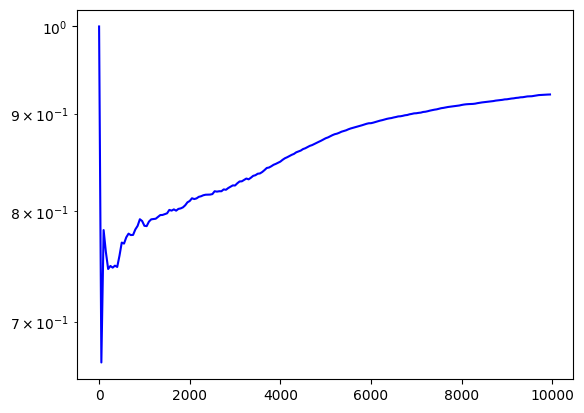

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.5686274509803921
100: 0.5544554455445545
150: 0.5960264900662252
200: 0.5920398009950248
250: 0.601593625498008
300: 0.6112956810631229
350: 0.6125356125356125
400: 0.6159600997506235
450: 0.6274944567627494
500: 0.6327345309381237
550: 0.6388384754990926
600: 0.6405990016638935
650: 0.6451612903225806
700: 0.6462196861626248
750: 0.6524633821571239
800: 0.6566791510611736
850: 0.6615746180963572
900: 0.6648168701442841
950: 0.668769716088328
1000: 0.6623376623376623
1050: 0.6660323501427212
1100: 0.6666666666666666
1150: 0.6655082536924414
1200: 0.6677768526228143
1250: 0.6754596322941646
1300: 0.6787086856264412
1350: 0.6831976313841599
1400: 0.6866523911491792
1450: 0.687801516195727
1500: 0.692871419053964
1550: 0.6931012250161186
1600: 0.6964397251717677
1650: 0.7007874015748031
1700: 0.7048794826572604
1750: 0.7041690462592805
1800: 0.7068295391449195
1850: 0.710

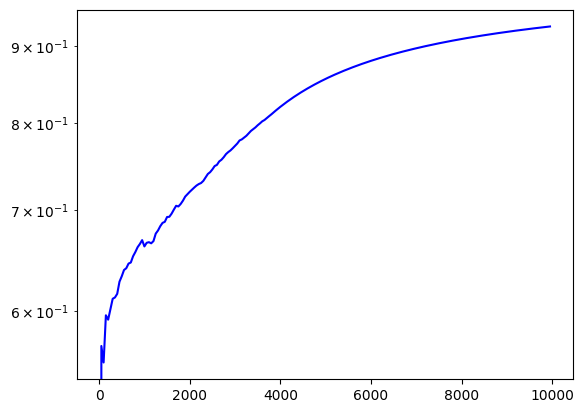

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.19607843137254902
100: 0.21782178217821782
150: 0.2781456953642384
200: 0.2885572139303483
250: 0.29880478087649404
300: 0.31893687707641194
350: 0.32763532763532766
400: 0.3491271820448878
450: 0.36363636363636365
500: 0.3872255489021956
550: 0.3992740471869328
600: 0.39434276206322794
650: 0.40706605222734255
700: 0.4165477888730385
750: 0.42876165113182424
800: 0.4369538077403246
850: 0.44300822561692127
900: 0.4439511653718091
950: 0.45215562565720296
1000: 0.46253746253746253
1050: 0.47002854424357754
1100: 0.4750227066303361
1150: 0.4795829713292789
1200: 0.48626144879267275
1250: 0.4940047961630695
1300: 0.49884704073789393
1350: 0.5085122131754256
1400: 0.5160599571734475
1450: 0.5217091660923501
1500: 0.5276482345103265
1550: 0.5338491295938105
1600: 0.5346658338538414
1650: 0.5366444579043004
1700: 0.5414462081128748
1750: 0.5431182181610509
1800: 0.545252637

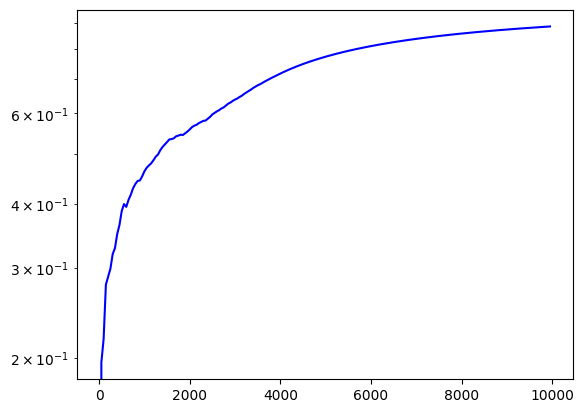

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.0
100: 0.0
150: 0.0
200: 0.0
250: 0.0
300: 0.0
350: 0.0
400: 0.0
450: 0.0022172949002217295
500: 0.001996007984031936
550: 0.0018148820326678765
600: 0.0016638935108153079
650: 0.0015360983102918587
700: 0.0014265335235378032
750: 0.0013315579227696406
800: 0.0012484394506866417
850: 0.0011750881316098707
900: 0.0011098779134295228
950: 0.0010515247108307045
1000: 0.000999000999000999
1050: 0.0009514747859181732
1100: 0.0009082652134423251
1150: 0.0008688097306689834
1200: 0.0008326394671107411
1250: 0.0007993605115907274
1300: 0.0007686395080707148
1350: 0.0007401924500370096
1400: 0.0007137758743754461
1450: 0.0013783597518952446
1500: 0.0013324450366422385
1550: 0.0012894906511927789
1600: 0.0012492192379762648
1650: 0.0012113870381586917
1700: 0.0011757789535567313
1750: 0.001142204454597373
1800: 0.001110494169905608
1850: 0.0010804970286331713
1900: 0.00105207785

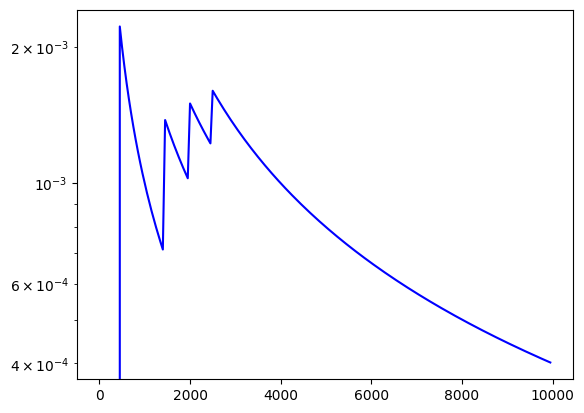

In [4]:
NIM_SIZE = 5
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy)

#### **Reinforce Agent with Nim(3)** while saving previous reinfoced agent

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 1.0
50: 0.803921568627451
100: 0.8316831683168316
150: 0.8013245033112583
200: 0.8009950248756219
250: 0.8167330677290837
300: 0.8205980066445183
350: 0.8262108262108262
400: 0.8354114713216958
450: 0.8470066518847007
500: 0.8522954091816367
550: 0.8548094373865699
600: 0.8585690515806988
650: 0.8602150537634409
700: 0.8659058487874465
750: 0.8668442077230359
800: 0.8664169787765293
850: 0.8730904817861339
900: 0.8790233074361821
950: 0.8832807570977917
1000: 0.8871128871128872
1050: 0.8896289248334919
1100: 0.8928247048138056
1150: 0.895742832319722
1200: 0.8967527060782681
1250: 0.8976818545163869
1300: 0.9008455034588778
1350: 0.9030347890451518
1400: 0.9036402569593148
1450: 0.9062715368711234
1500: 0.9073950699533644
1550: 0.9090909090909091
1600: 0.9119300437226733
1650: 0.9139915202907329
1700: 0.9159318048206937
1750: 0.9171901770416905
1800: 0.9183786785119378
1850: 0.9195029713668288
1900: 0.9200420831141505
1950: 0.92209

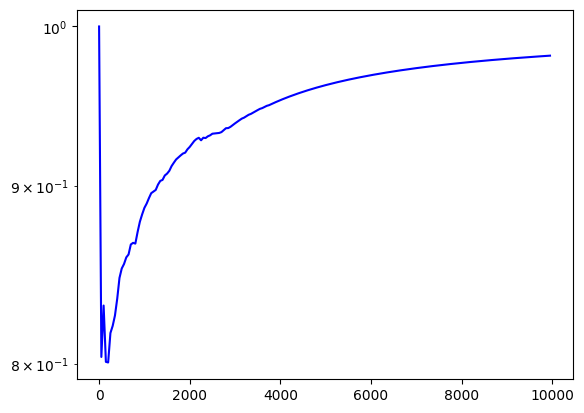

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9809019098090191
50: 0.979504526912745
100: 0.9792099792099792
150: 0.9788198207073194
200: 0.9784334869130478
250: 0.9778558189444932
300: 0.97738083681196
350: 0.9767172253888513
400: 0.9764445726372464
450: 0.9756961056358243
500: 0.975430911341777
550: 0.9751682304994788
600: 0.9750966889916046
650: 0.9751197070697587
700: 0.9751425100457901
750: 0.9749790717142591
800: 0.9749097305805018
850: 0.9744723988572482
900: 0.9743142830932942
950: 0.9744315587617569
1000: 0.9742750659030998
1050: 0.9739390100443399
1100: 0.973786145392307
1150: 0.973724329656533
1200: 0.9736630657976967
1250: 0.973513465469736
1300: 0.9734536766657818
1350: 0.97348251255396
1400: 0.9734233839136918
1450: 0.973452100253253
1500: 0.9733936179462656
1550: 0.9730759241624102
1600: 0.9731919662098095
1650: 0.9730495236460389
1700: 0.97299376121699
1750: 0.9728533741809208
1800: 0.9728836539276332
1850: 0.9727449160408405
1900: 0.9724392908158979
1950: 0.

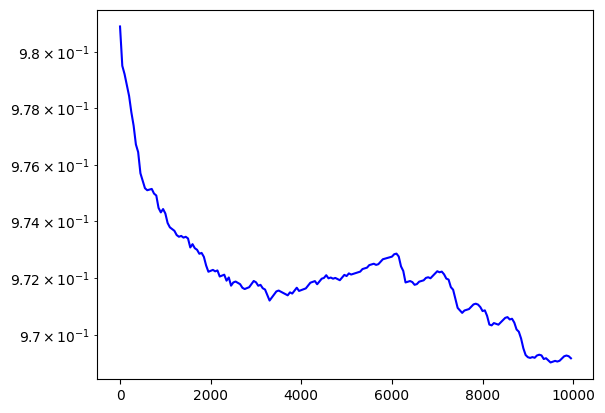

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9691515424228788
50: 0.968829484813725
100: 0.9689070195512661
150: 0.9689841695201231
200: 0.9690609375773477
250: 0.9691373265517752
300: 0.9692133392443723
350: 0.9692889784285784
400: 0.9693642468506446
450: 0.9694391472299643
500: 0.9695136822594019
550: 0.9695878546056153
600: 0.9696616669093733
650: 0.96973512178587
700: 0.9698082218250326
750: 0.9698809695918269
800: 0.9699533676265564
850: 0.9700254184451585
900: 0.9700971245394957
950: 0.970168488377643
1000: 0.9702395124041713
1050: 0.9703101990404256
1100: 0.9703805506848017
1150: 0.9704505697130159
1200: 0.9705202584783736
1250: 0.9705896193120324
1300: 0.9706586545232618
1350: 0.9707273663997003
1400: 0.9707957572076071
1450: 0.9708638291921122
1500: 0.9709315845774615
1550: 0.970999025567259
1600: 0.9710661543447062
1650: 0.9711329730728373
1700: 0.9711994838947514
1750: 0.9712656889338421
1800: 0.9713315902940232
1850: 0.9713971900599515
1900: 0.9714624902972467
1

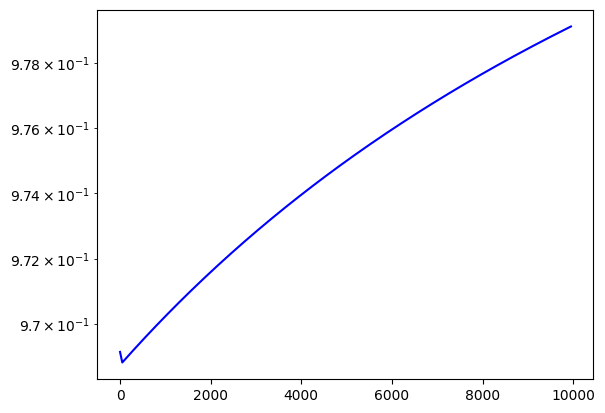

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9791673610879638
50: 0.9791687464643439
100: 0.9792033487259559
150: 0.9792378362243375
200: 0.9792722095294858
250: 0.9793064692076295
300: 0.97934061582126
350: 0.9793746499291621
400: 0.9794085720864445
450: 0.97944238284457
500: 0.9794760827513852
550: 0.9795096723511505
600: 0.9795431521845691
650: 0.979576522788816
700: 0.9796097846975669
750: 0.9796429384410263
800: 0.9796759845459563
850: 0.9797089235357038
900: 0.9797417559302288
950: 0.979774482246131
1000: 0.9798071029966775
1050: 0.9798396186918296
1100: 0.9798720298382688
1150: 0.9799043369394241
1200: 0.9799365404954969
1250: 0.9799686410034879
1300: 0.9800006389572218
1350: 0.9800325348473733
1400: 0.9800643291614917
1450: 0.9800960223840259
1500: 0.9801276149963494
1550: 0.9801591074767836
1600: 0.9801905003006234
1650: 0.9802217939401598
1700: 0.9802529888647046
1750: 0.9802840855406129
1800: 0.9803150844313072
1850: 0.9803459859972999
1900: 0.9803767906962164
19

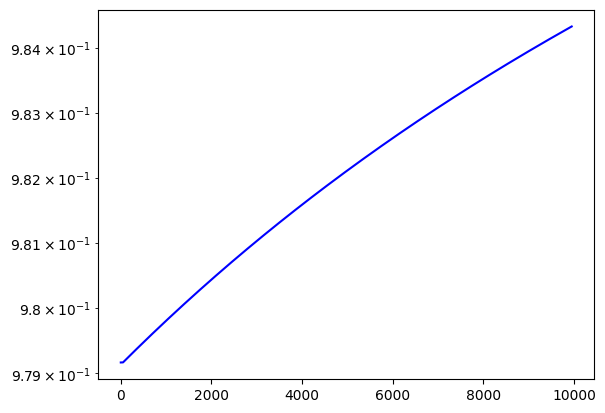

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9843253918652034
50: 0.9836708197048762
100: 0.9830677539213486
150: 0.9824661901322508
200: 0.9818661227332653
250: 0.9812675461479218
300: 0.9806704548274237
350: 0.9800748432504771
400: 0.9794807059231208
450: 0.9788880373785568
500: 0.9782968321769833
550: 0.9777070849054277
600: 0.9771187901775819
650: 0.9765319426336375
700: 0.9759465369401243
750: 0.9753625677897475
800: 0.9747800299012279
850: 0.9741989180191427
900: 0.9736192269137673
950: 0.9730409513809186
1000: 0.972464086241799
1050: 0.9718886263428418
1100: 0.9713145665555583
1150: 0.9707419017763845
1200: 0.9701706269265309
1250: 0.9696007369518315
1300: 0.969032226822595
1350: 0.9684650915334575
1400: 0.9678993261032343
1450: 0.9673349255747751
1500: 0.9667718850148189
1550: 0.9662101995138505
1600: 0.9656498641859571
1650: 0.9650908741686874
1700: 0.9645332246229107
1750: 0.9639769107326771
1800: 0.9634219277050788
1850: 0.962868270770113
1900: 0.9623159351805446

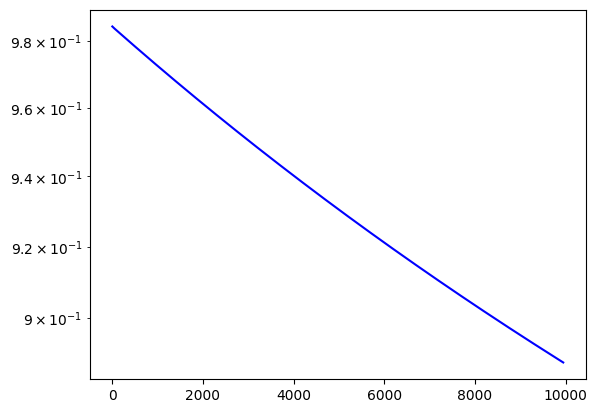

In [8]:
NIM_SIZE = 3
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy, reinforced_agent)

#### **Reinforce Agent with Nim(5)** while saving previous reinfoced agent

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.803921568627451
100: 0.801980198019802
150: 0.847682119205298
200: 0.835820895522388
250: 0.8326693227091634
300: 0.840531561461794
350: 0.8490028490028491
400: 0.85785536159601
450: 0.8603104212860311
500: 0.8622754491017964
550: 0.8693284936479129
600: 0.8768718801996672
650: 0.8847926267281107
700: 0.8830242510699001
750: 0.8854860186418109
800: 0.885143570536829
850: 0.8836662749706228
900: 0.8867924528301887
950: 0.8906414300736067
1000: 0.8941058941058941
1050: 0.8962892483349191
1100: 0.8991825613079019
1150: 0.9009556907037359
1200: 0.9042464612822648
1250: 0.9048760991207034
1300: 0.90315142198309
1350: 0.9030347890451518
1400: 0.9050678087080657
1450: 0.906960716747071
1500: 0.9093937375083277
1550: 0.9103803997421018
1600: 0.9106808244846971
1650: 0.9115687462144155
1700: 0.9112286890064668
1750: 0.910908052541405
1800: 0.9111604664075513
1850: 0.91139924365

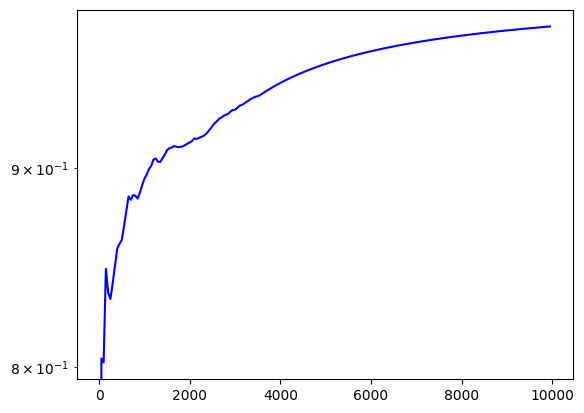

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.9785021497850215
50: 0.9780121380957119
100: 0.9773289773289773
150: 0.9770465963944439
200: 0.976766983629056
250: 0.9762949956101844
300: 0.9757305116008155
350: 0.975557917109458
400: 0.9753869820209595
450: 0.9754090517653813
500: 0.9753356823159699
550: 0.9751682304994788
600: 0.9750966889916046
650: 0.9748380433762088
700: 0.9743949163629567
750: 0.9741419402846246
800: 0.9739838903805204
850: 0.9738272970233158
900: 0.9737638748738647
950: 0.9737010318692357
1000: 0.9730024543223343
1050: 0.9727626459143969
1100: 0.9727051616971444
1150: 0.9726481929871761
1200: 0.9725024551379341
1250: 0.9725357745978135
1300: 0.9720378727546235
1350: 0.9716324552902827
1400: 0.9710551705990702
1450: 0.9710942275783775
1500: 0.9710459960003478
1550: 0.9710847545667042
1600: 0.9706921817084734
1650: 0.9705604669127114
1700: 0.970600803350141
1750: 0.970385499106459
1800: 0.9702567579018

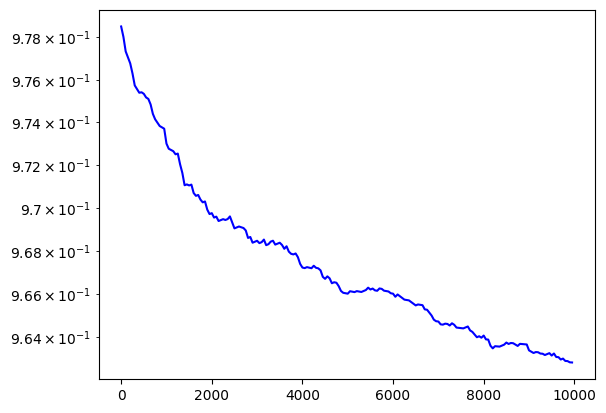

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.9628518574071296
50: 0.9629444915465563
100: 0.9630366648425451
150: 0.9631283807255223
200: 0.9632196425919509
250: 0.9633104538047503
300: 0.9634008176937097
350: 0.9634907375558941
400: 0.9635802166560463
450: 0.9636692582269816
500: 0.9637578654699771
550: 0.9638460415551555
600: 0.963933789621863
650: 0.9640211127790421
700: 0.9641080141055988
750: 0.9641944966507638
800: 0.9642805634344502
850: 0.9643662174476044
900: 0.9644514616525525
950: 0.964536298983342
1000: 0.9646207323460788
1050: 0.964704764619258
1100: 0.9647883986540923
1150: 0.9648716372748334
1200: 0.9649544832790906
1250: 0.9650369394381441
1300: 0.9651190084972536
1350: 0.9652006931759637
1400: 0.9652819961684034
1450: 0.965362920143583
1500: 0.9654434677456862
1550: 0.9655236415943576
1600: 0.9656034442849868
1650: 0.9656828783889889
1700: 0.9657619464540804
1750: 0.9658406510045515
1800: 0.9659189945415

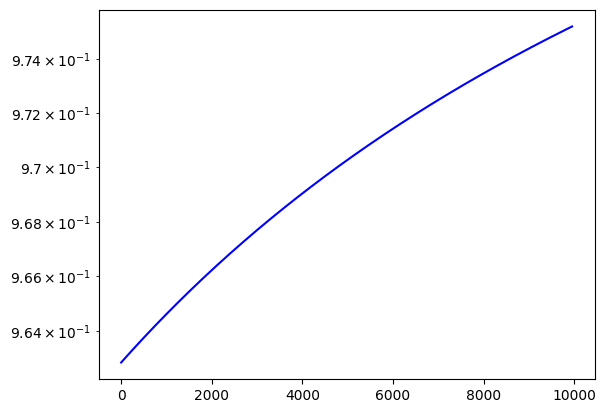

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.975200826639112
50: 0.9744434461415593
100: 0.9739211321882993
150: 0.9735332161454014
200: 0.9735770338730506
250: 0.9736207067534958
300: 0.9736642355037788
350: 0.9737076208362163
400: 0.9737508634584389
450: 0.9737939640734294
500: 0.9738369233795613
550: 0.973879742070636
600: 0.9739224208359204
650: 0.973964960360184
700: 0.9740073613237353
750: 0.9740496244024585
800: 0.9740917502678484
850: 0.9741337395870474
900: 0.9741755930228795
950: 0.9742173112338858
1000: 0.9742588948743589
1050: 0.974300344594377
1100: 0.974341661039838
1150: 0.9743828448524927
1200: 0.9744238966699785
1250: 0.974464817125852
1300: 0.9745056068496214
1350: 0.9745462664667793
1400: 0.9745867965988344
1450: 0.974627197863343
1500: 0.9746674708739405
1550: 0.9747076162403727
1600: 0.9747476345685263
1650: 0.9747875264604594
1700: 0.9748272925144317
1750: 0.9748669333249347
1800: 0.9749064494827206

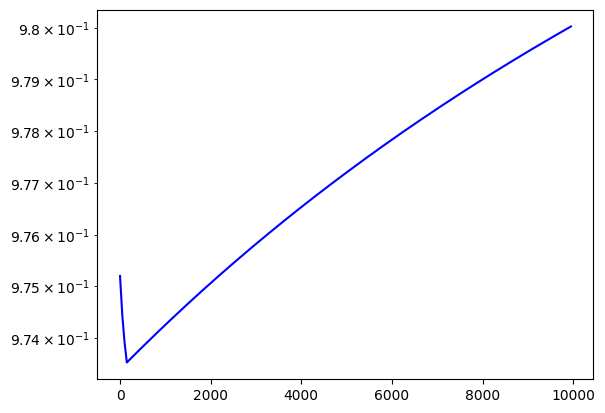

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.9800254993625159
50: 0.9788020274150458
100: 0.9775816064437296
150: 0.9763891310303604
200: 0.9751996218999527
250: 0.9740130679983106
300: 0.9728046450460286
350: 0.9715992168719486
400: 0.9703967723571199
450: 0.9691973004375665
500: 0.968000790103948
550: 0.9668072304012232
600: 0.9656166104283146
650: 0.9644289193377776
700: 0.9632441463354708
750: 0.9620622806802287
800: 0.9608833116835371
850: 0.9597072287092115
900: 0.9585340211730764
950: 0.9573636785426485
1000: 0.956196190336821
1050: 0.9550315461255512
1100: 0.9538697355295491
1150: 0.9527107482199704
1200: 0.9515545739181088
1250: 0.9504012023950934
1300: 0.9492506234715866
1350: 0.9481028270174845
1400: 0.9469578029516196
1450: 0.9458155412414658
1500: 0.9446760319028458
1550: 0.943539264999639
1600: 0.9424052306434941
1650: 0.9412739189935416
1700: 0.940145320256109
1750: 0.9390194246844387
1800: 0.9378962225784

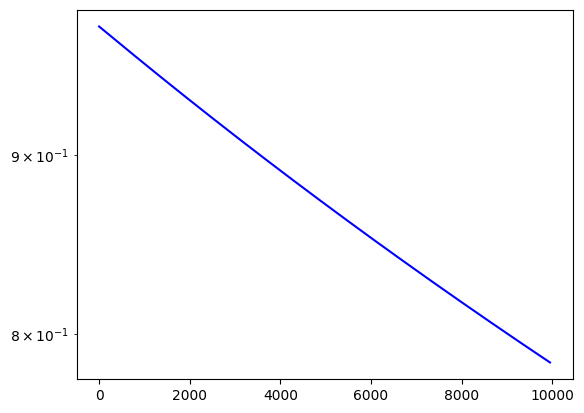

In [20]:
NIM_SIZE = 5
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy, reinforced_agent)

## ***RL strategy***

In [5]:
def rl_strategy(nim: NimBoard, robot: Agent) -> Nimply:
    state, _ = nim.get_state_and_reward()  # get the current state
    return robot.choose_action(state)

### Evaluation functions modified specifically for a RL Agent

In [6]:
from typing import Callable

# Play Game with RL Agent
def play_nim_rl(num_of_heaps: int, a: Callable, b: Callable, robot: Agent, robo_first=True, k = None, display_board=False) -> None:
    nim = NimBoard(num_of_heaps, k)
    if display_board:
        nim.display_board()
    strategies = (a, b)
    
    players = ['a', 'b']
    turn = 0
    while not game_over(nim, players, turn):
        if robo_first and turn == 0:
            ply = strategies[turn](nim, robot)
        elif not robo_first and turn == 1:
            ply = strategies[turn](nim, robot)
        else:
            ply = strategies[turn](nim)
        nim.nimming(ply)
        if display_board:
            nim.display_board()
        turn = (turn + 1) % 2
    return nim.winner

# Evaluate Ten Games wth RL Agent
NUM_MATCHES = 10
def evaluate_rl(strategy: Callable, other_strategy: Callable, robot: Agent, k=None, nim_size=10) -> float:
    won_1 = 0
    won_2 = 0

    for _ in range(NUM_MATCHES):
        winner_first = play_nim_rl(nim_size, strategy, other_strategy, robot, True, k)
        winner_second = play_nim_rl(nim_size, other_strategy, strategy, robot, False, k)
        if winner_first == 0:
            won_1 += 1
        if winner_second == 1:
            won_2 += 1
    return won_1 / NUM_MATCHES, won_2 / NUM_MATCHES



#### **Note**: the following cells should be executed after the corresponding RL approach has been executed an not in the order they appear

### Evaluate Reinforced agent for Nim(3) w/o incremental learning

In [11]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=3))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=3))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=3))

(1.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)


### Evaluate Reinforced agent for Nim(3) with incremental learning

In [9]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=3))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=3))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=3))

(1.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)


### Evaluate Reinforced agent for Nim(5) w/o incremental learning

In [7]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=5))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=5))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=5))

(0.9, 0.9)
(1.0, 1.0)
(0.0, 0.0)


### Evaluate Reinforced agent for Nim(5) with incremental learning

In [19]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=5))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=5))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=5))

(1.0, 0.9)
(1.0, 0.0)
(0.0, 0.0)
